This many repeats:	8192
out count:	1820
in count:	6372
all count:	8192
last estimate:	3.111328125


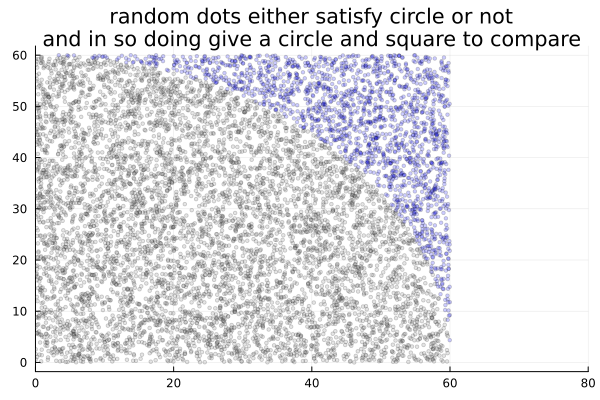

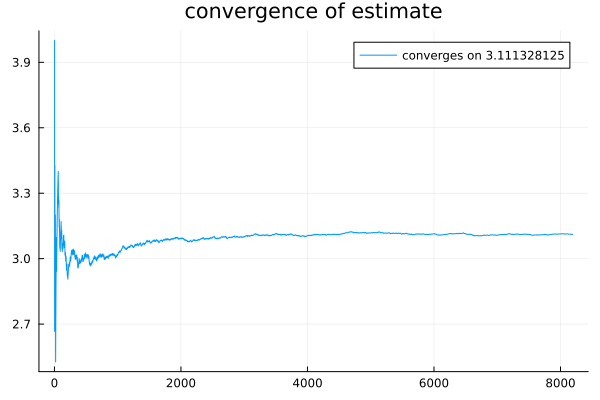

In [3]:
#=
Monte_Carlo_π
Kata
MIT license copyright Cailleach Computing Dr Keith S Reid 2023
Intent: dropped matchsticks model approximation of π
=#

# s.0 Packages

using Plots
using Test

# s.1 Config

function get_repeats()
    repeats::UInt64   = 8192
    return repeats
end

function get_radius()
    radius::UInt64    = 60
    return radius
end

# s.2 Model

# all in the loop - could refactor

# s.3 View

function tell_repeats(repeats)

end

# s.4 Control
function monte_carlo_π_main()
    repeats    = get_repeats()   
    radius     = get_radius()
    π_graph    = plot(legend=:false, xlims=(0,80), title="random dots either satisfy circle or not\nand in so doing give a circle and square to compare") 
    out_count  = 0
    in_count   = 0
    all_count  = 0
    estimates  = []
    for repeat in 1:repeats
        start_x::Float64    = 0
        start_y::Float64    = 0 
        small_start         = [start_x, start_y]
        stop_x              = rand()* radius
        stop_y              = rand()* radius
        euclidean           = sqrt(stop_x^2 + stop_y^2)
        stop                = [stop_x, stop_y]
        if euclidean ≥ radius
            out_count += 1
            all_count += 1
            graph               = scatter!(π_graph, [stop[1]], [stop[2]], 
                                    color = "blue", alpha=0.2, mark=2)
        else
            in_count  += 1
            all_count += 1
            graph               = scatter!(π_graph, [stop[1]], [stop[2]],
                                    color = "gray", alpha=0.2, mark=2)
        end
        implied_circle          = 4 * in_count
        implied_π               = implied_circle / all_count
        push!(estimates, implied_π)
    end
    println("This many repeats:\t", repeats)
    println("out count:\t", out_count)
    println("in count:\t", in_count)
    println("all count:\t", all_count)
    println("last estimate:\t", estimates[end])
    convergence_graph = plot([x[1] for x  in enumerate(estimates)],
                             [x[2] for x  in enumerate(estimates)], 
                            title="convergence of estimate", 
                            label="converges on "*string(estimates[end]))    
    display(π_graph)
    display(convergence_graph)
end

monte_carlo_π_main()